<a href="https://colab.research.google.com/github/krakowiakpawel9/uczenie_maszynowe/blob/master/decision_trees/classification/02_Gini_vs_Entropia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pierwsze Drzewo Decyzyjne

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
sns.set()

### Załadowanie danych

In [2]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = [name.replace(' ', '_')[:-5] for name in iris.feature_names]
class_names = iris.target_names

print('Liczba próbek:', len(data))
print('Kształt danych', data.shape)
print('Nazwy zmiennych objaśniających:', feature_names)
print('Nazwy kategorii kosaćca:', class_names)

Liczba próbek: 150
Kształt danych (150, 4)
Nazwy zmiennych objaśniających: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Nazwy kategorii kosaćca: ['setosa' 'versicolor' 'virginica']


### Iris Setosa

In [3]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_setosa.jpg', width=300)

### Iris Versicolor

In [4]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_versicolor.jpg', width=300)

### Iris Virginica

In [5]:
Image(url='https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/graphs/Iris_virginica.jpg', width=300)

## Poznaj swoje dane

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [7]:
data_targets = np.c_[data, targets]
df = pd.DataFrame(data_targets, columns=feature_names + ['class'])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null float64
dtypes: float64(5)
memory usage: 5.9 KB


In [9]:
df.describe().apply(lambda x: round(x, 2))

,sepal_length,sepal_width,petal_length,petal_width,class
count,150.00,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20,1.00
std,0.83,0.44,1.77,0.76,0.82
min,4.30,2.00,1.00,0.10,0.00
25%,5.10,2.80,1.60,0.30,0.00
50%,5.80,3.00,4.35,1.30,1.00
75%,6.40,3.30,5.10,1.80,2.00
max,7.90,4.40,6.90,2.50,2.00


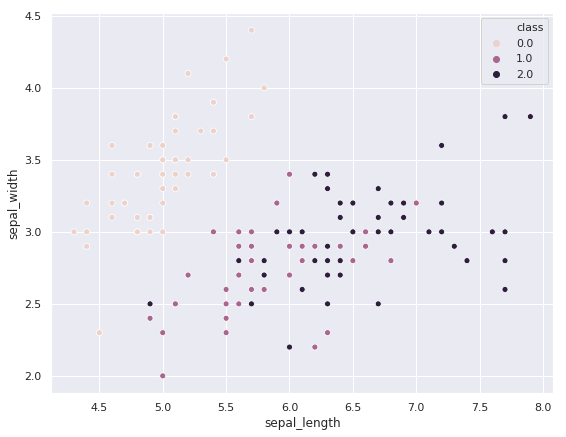

In [10]:
plt.figure(figsize=(9, 7))
sns.scatterplot('sepal_length', 'sepal_width', hue='class', data=df, legend='full')

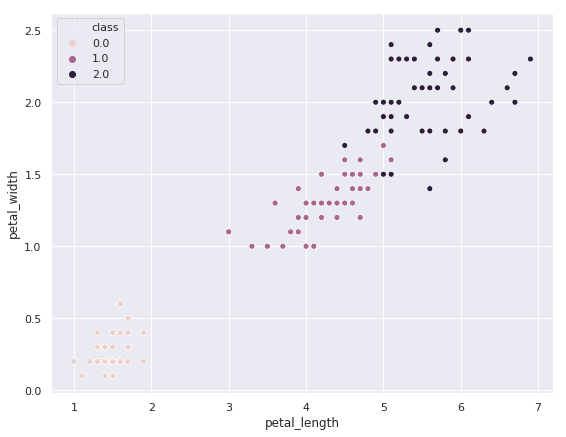

In [11]:
plt.figure(figsize=(9, 7))
sns.scatterplot('petal_length', 'petal_width', hue='class', data=df, legend='full')

In [12]:
df['class'].value_counts()

2.0    50
1.0    50
0.0    50
Name: class, dtype: int64

### Przygotowanie danych do modelu

In [0]:
X = df.copy()
X = X[['petal_length', 'petal_width', 'class']]
y = X.pop('class')

In [14]:
X.head()

,petal_length,petal_width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [15]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: class, dtype: float64

### Konwersja DataFrame do tablic numpy

In [0]:
X = X.values
y = y.values.astype('int16')

### Budowa klasyfikatora drzewa decyzyjnego
- max_depth=1


In [17]:
tree_clf = DecisionTreeClassifier(max_depth=1, random_state=30)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=30, splitter='best')

### Wykreślenie granic decyzyjnych

Text(0.5, 1.0, 'Drzewo decyzyjne: max_depth=1')

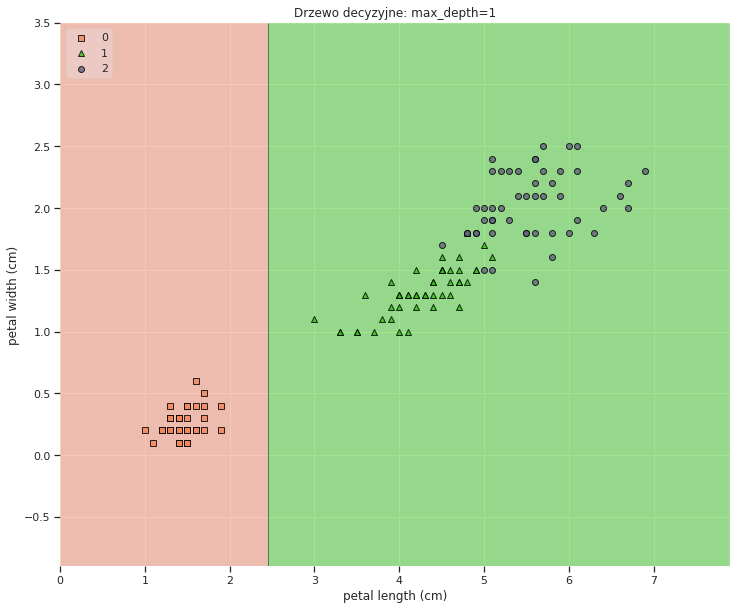

In [18]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

plt.figure(figsize=(12, 10))
plot_decision_regions(X, y, tree_clf, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=1')

In [19]:
print('Dokładność modelu: ' + str(round(tree_clf.score(X, y), 4) * 100) + '%')

Dokładność modelu: 66.67%


### Graf drzewa decyzyjnego
- max_depth = 1

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(tree_clf,
               out_file='iris_tree.dot',
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

### Przekonwertowanie pliku .dot na plik .png

In [0]:
%%bash
dot -Tpng iris_tree.dot -o iris_tree_1.png

### Bardziej przyjazny dla Python'a sposób

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


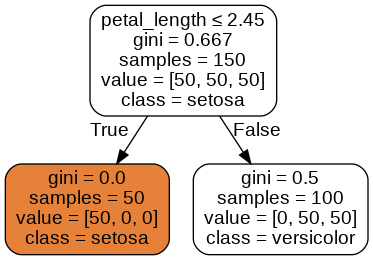

In [22]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree_clf,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())

### Budowa prostej funkcji dla modelu drzewa decyzyjnego

In [0]:
def make_decision_tree(max_depth=1):
    # train model
    tree_clf = DecisionTreeClassifier(max_depth=max_depth, random_state=30)
    tree_clf.fit(X, y)

    # export graph
    dot_data = StringIO()
    export_graphviz(tree_clf,
                   out_file=dot_data,
                   feature_names=feature_names[2:],
                   class_names=class_names,
                   special_characters=True,
                   rounded=True,
                   filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    graph.write_png('graph.png')
    
    
    # plot decision boundries
    colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'
    plt.figure(figsize=(12, 10))
    ax = plot_decision_regions(X, y, tree_clf, legend=0, colors=colors)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['setosa', 'versicolor', 'virginica'], framealpha=0.3)
    plt.xlabel('petal length (cm)')
    plt.ylabel('petal width (cm)')
    plt.title('Drzewo decyzyjne: max_depth={}'.format(max_depth))
    
    # accuracy
    print('Dokładność modelu: ' + str(round(tree_clf.score(X, y) * 100, 2)) + '%')
    return Image(graph.create_png())

## Budowa klasyfikatora drzewa decyzyjnego - kryterium Gini
- max_depth=2


Dokładność modelu: 96.0%


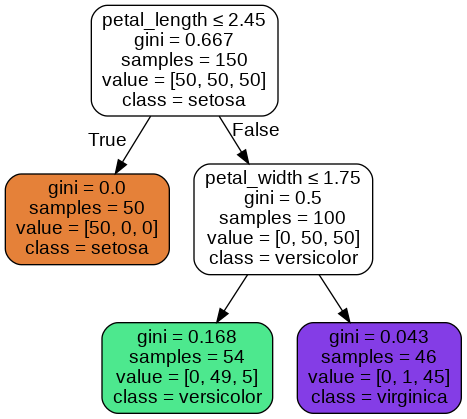

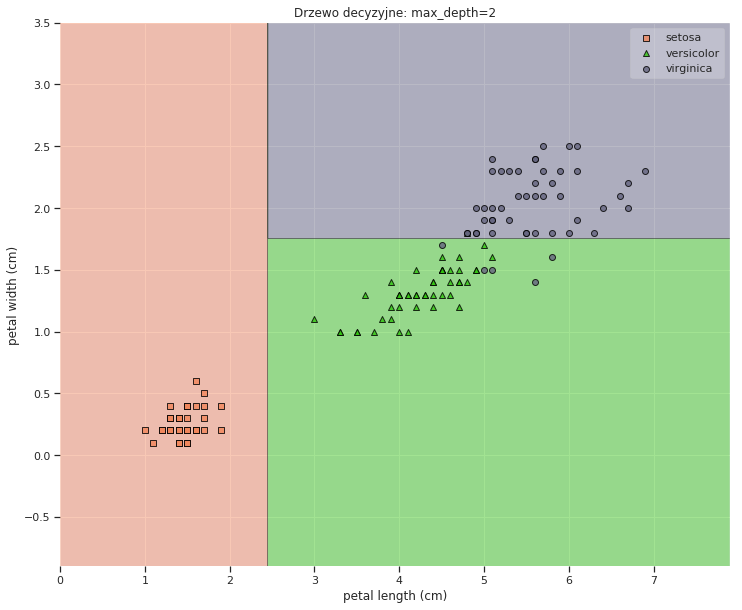

In [28]:
make_decision_tree(max_depth=2)

### Wskaźnik Giniego
Miara zanieczyszczenia
- węzeł jest czysty (wszystkie próbki w węźle należą do tej samej klasy), gdy Gini = 0

$$G_i = 1 - \sum_{k=1}^{n}p_{i,k}^{2}$$

$p_{i, k}$ - współczynnik występowania klas k wśród próbek uczących w $i$-tym węźle

### Gini dla korzenia (root) - poziom 0

In [25]:
1 - (50 / 150)**2 - (50 / 150)**2 - (50 / 150)**2

0.6666666666666665

### Poziom 1, węzeł lewy

In [26]:
1 - (50 / 50)**2 - (0 / 50)**2 - (0 / 50)**2

0.0

### Poziom 1, węzeł prawy

In [30]:
1 - (0 / 50)**2 - (50 / 100)**2 - (50 / 100)**2

0.5

### Poziom 2, węzeł lewy

In [31]:
1 - (49 / 54)**2 - (5 / 54)**2

0.1680384087791495

### Poziom 2, węzeł prawy

In [32]:
1 - (1 / 46)**2 - (45 / 46)**2

0.04253308128544431

## Budowa klasyfikatora drzewa decyzyjnego - kryterium Entropia

In [33]:
tree_clf = DecisionTreeClassifier(max_depth=2, criterion='entropy', random_state=30)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=30, splitter='best')

Text(0.5, 1.0, 'Drzewo decyzyjne: max_depth=1')

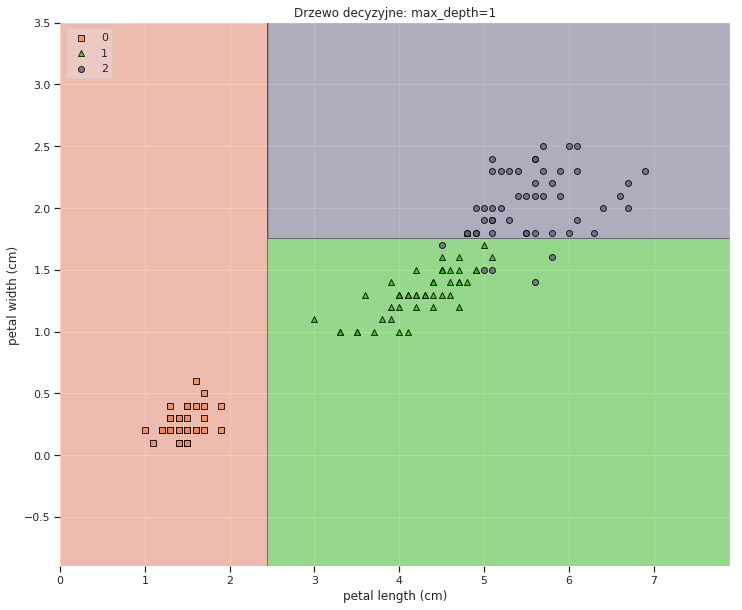

In [34]:
from mlxtend.plotting import plot_decision_regions

colors='#f1865b,#31c30f,#64647F,#d62728,#9467bd,#8c564b,#e377c2,#7f7f7f,#bcbd22,#17becf'

plt.figure(figsize=(12, 10))
plot_decision_regions(X, y, tree_clf, legend=2, colors=colors)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('Drzewo decyzyjne: max_depth=1')

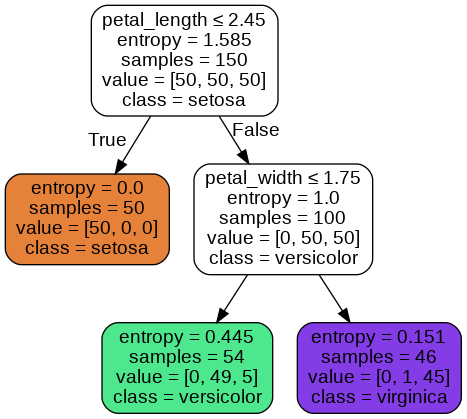

In [36]:
dot_data = StringIO()
export_graphviz(tree_clf,
               out_file=dot_data,
               feature_names=feature_names[2:],
               class_names=class_names,
               special_characters=True,
               rounded=True,
               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('graph.png')
Image(graph.create_png())

### Entropia

## $$Entropia  = -\sum_{k=1, p_{i,k}\ne 0}^{n}p_{i,k} \cdot log_{2}(p_{i,k})$$

In [37]:
-((50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150) + (50 / 150) * np.log2(50 / 150))

1.584962500721156

In [38]:
-((50 / 50) * np.log2(50 / 50))

-0.0

In [41]:
-((50 / 100) * np.log2(50 / 100) + (50 / 100) * np.log2(50 / 100))

1.0